In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('/home/filip/xy-calibration/results/dumpedTraces_12825.txt')
timing = np.loadtxt('/home/filip/xy-calibration/results/pulseTiming_12825.txt')

(-10000.0, 1000.0)

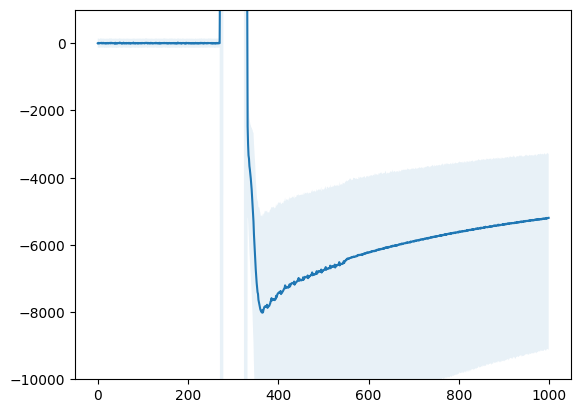

In [17]:
mean = np.median(data, axis=0)
std = np.std(data, axis=0)

plt.plot(np.arange(len(data[0])), np.mean(data, axis=0))
plt.fill_between(np.arange(len(data[0])), mean + std, mean - std, alpha=0.1)

plt.ylim(-10000, 1000)


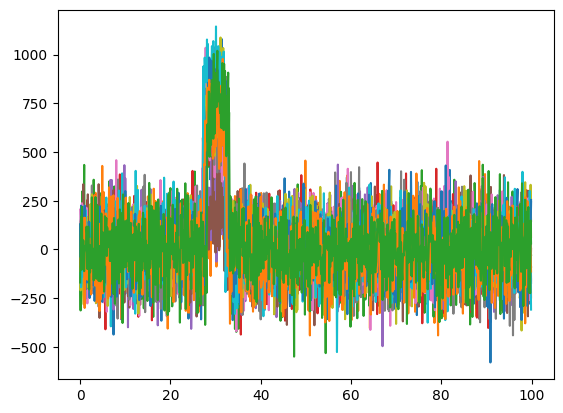

In [5]:
upgoing, downgoing = [], []
event_count = len(data)

for trace in data:
    if not (np.max(trace) > 1 * np.mean([np.std(trace[:200]), np.std(trace[-200:])])): continue
    diff = np.diff(trace)
    up = np.argmax(diff[10:-10])
    down = np.argmin(diff[10:-10])
    upgoing.append(up)
    downgoing.append(down)
    event_count -= 1

    if not (200 < up < 400):
        plt.plot(np.arange(len(trace))/10, trace)


In [9]:
len(data[10:-10])

1567

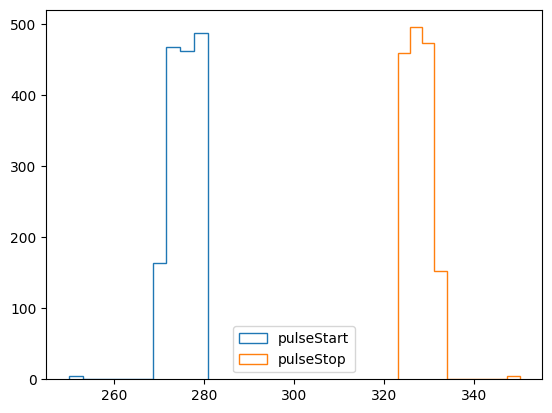

In [8]:

# n, _, _ = plt.hist(upgoing, bins=40, histtype='step', label='upgoing')
# plt.hist(downgoing, bins=40, histtype='step', label='downgoing')
plt.hist(timing[:, 1], histtype='step', label='pulseStart')
plt.hist(timing[:, 2], histtype='step', label='pulseStop')
# plt.yscale('log')

plt.legend()

In [28]:
print(upgoing)

[263, 264, 267, 266, 265, 269, 263, 270, 266, 268, 263, 265, 265, 266, 271, 269, 265, 265, 264, 270, 268, 264, 264, 268, 263, 262, 261, 267, 263, 264, 267, 261, 269, 263, 267, 264, 270, 265, 262, 261, 270, 263, 264, 266, 261, 266, 264, 267, 262, 262, 265, 266, 265, 270, 268, 261, 266, 271, 265, 266, 271, 270, 265, 263, 265, 266, 262, 261, 266, 269, 266, 264, 270, 264, 267, 265, 262, 262, 266, 265, 269, 261, 279, 262, 268, 266, 266, 267, 271, 266, 269, 262, 268, 269, 266, 269, 262, 266, 268, 263, 263, 269, 264, 262, 262, 271, 269, 262, 268, 266, 266, 265, 262, 270, 269, 267, 268, 269, 262, 262, 269, 269, 267, 267, 263, 270, 265, 267, 270, 267, 262, 264, 268, 269, 267, 64, 269, 266, 271, 267, 268, 263, 265, 264, 266, 264, 264, 267, 265, 270, 261, 264, 268, 263, 266, 261, 268, 267, 267, 264, 267, 264, 266, 270, 263, 264, 267, 267, 264, 263, 268, 262, 261, 261, 263, 267, 268, 264, 265, 262, 270, 268, 271, 264, 270, 268, 264, 261, 262, 267, 266, 266, 270, 268, 266, 266, 267, 265, 261, 269, 

In [30]:
print(n)

[1.00e+00 2.00e+00 1.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 1.22e+03 3.54e+02 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 1.00e+00
 1.00e+00 1.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 1.00e+00 1.00e+00]


In [39]:
print(event_count)

14


In [43]:
print(len(timing), -sum(timing[:, -1]))

1587 1583.0


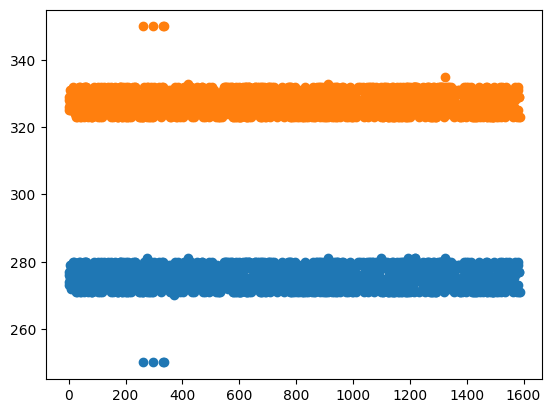

In [6]:
plt.scatter(range(len(timing)), timing[:, 1])
plt.scatter(range(len(timing)), timing[:, 2])

In [16]:
ll = [[[i, flash[1]], [i, flash[2]]] for i, flash in enumerate(timing)]

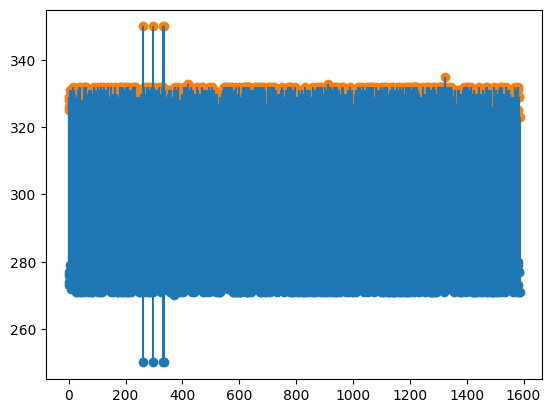

In [22]:
from matplotlib.collections import LineCollection

fig, ax = plt.subplots()

asd = LineCollection(ll)
ax.add_collection(asd)

ax.scatter(range(len(timing)), timing[:, 1])
ax.scatter(range(len(timing)), timing[:, 2])

# ax.set_xlim(0, 2000)
# ax.set_ylim(0, 600)

In [14]:
print(ll)

[[[0, 273.0], [0, 325.0]], [[1, 274.0], [1, 326.0]], [[2, 277.0], [2, 329.0]], [[3, 276.0], [3, 328.0]], [[4, 275.0], [4, 327.0]], [[5, 279.0], [5, 331.0]], [[6, 273.0], [6, 325.0]], [[7, 279.0], [7, 331.0]], [[8, 276.0], [8, 328.0]], [[9, 278.0], [9, 330.0]], [[10, 272.0], [10, 325.0]], [[11, 275.0], [11, 327.0]], [[12, 275.0], [12, 327.0]], [[13, 276.0], [13, 328.0]], [[14, 280.0], [14, 332.0]], [[15, 278.0], [15, 330.0]], [[16, 275.0], [16, 327.0]], [[17, 274.0], [17, 326.0]], [[18, 274.0], [18, 326.0]], [[19, 280.0], [19, 331.0]], [[20, 278.0], [20, 329.0]], [[21, 274.0], [21, 326.0]], [[22, 274.0], [22, 326.0]], [[23, 278.0], [23, 330.0]], [[24, 272.0], [24, 324.0]], [[25, 272.0], [25, 324.0]], [[26, 271.0], [26, 323.0]], [[27, 277.0], [27, 329.0]], [[28, 273.0], [28, 325.0]], [[29, 274.0], [29, 326.0]], [[30, 276.0], [30, 328.0]], [[31, 271.0], [31, 323.0]], [[32, 279.0], [32, 331.0]], [[33, 273.0], [33, 325.0]], [[34, 277.0], [34, 329.0]], [[35, 274.0], [35, 326.0]], [[36, 280.0